In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings('ignore') 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder # to convert target variable classes into number
from sklearn.model_selection import train_test_split # to split the dat into trining and testing
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics


In [2]:
import os
os.listdir()

[' logistic regression part-2.ipynb',
 ' Multiple Lenear Regression.ipynb',
 ' Project regression.ipynb',
 '.ipynb_checkpoints',
 '1.jfif',
 '2.jfif',
 '3.jfif',
 'assignment--logistic n knn.ipynb',
 'bank_features.csv',
 'Decision Tree',
 'Decision Tree.ipynb',
 'Decision Tree.pdf',
 'Ensemble techniques.ipynb',
 'housing_dataset.xlsx',
 'KNearest Neighbors.ipynb',
 'Logistic Regresion.ipynb',
 'Numbers.csv',
 'PCA--IRIS dta.ipynb',
 'PCA-Numbers Dataset---with logistic regression.ipynb',
 'PCA_image processing.ipynb',
 'Polynominal Regression.ipynb',
 'Practice--simple linear regression.ipynb',
 'qqplot.png',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [3]:
df = pd.read_excel(r"C:\Users\Rahul\Downloads\housing_dataset.xlsx")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df['total_bedrooms'].fillna(value='537',inplace=True)

In [9]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,INLAND,84700


In [10]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

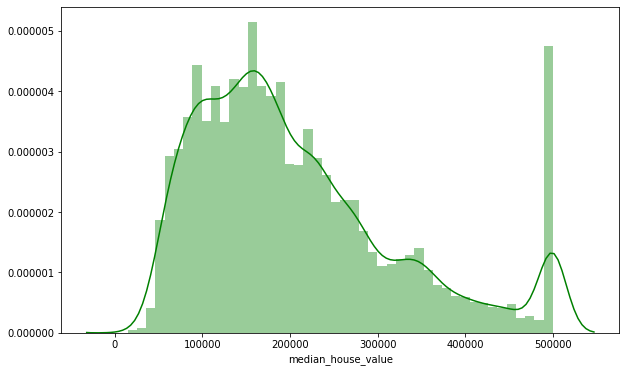

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(df['median_house_value'],color='green')
plt.show()

In [12]:
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [13]:
model1 = smf.ols(formula='median_house_value~longitude+latitude+housing_median_age+total_rooms+total_bedrooms+population+households+median_income',data=df).fit()


In [14]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     20.75
Date:                Mon, 20 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:29:03   Log-Likelihood:            -2.5806e+05
No. Observations:               20640   AIC:                         5.200e+05
Df Residuals:                   18709   BIC:                         5.353e+05
Df Model:                        1930                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

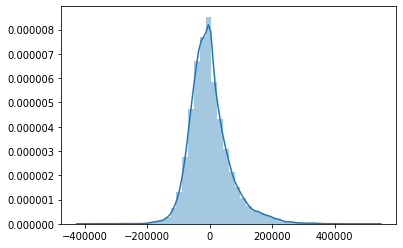

In [15]:
sns.distplot(model1.resid)
plt.show() 

In [16]:
import lmdiag

In [17]:
from scipy.stats import shapiro

In [18]:
shapiro(model1.resid)

(0.9421986937522888, 0.0)

In [19]:
pd.get_dummies(df,columns=['ocean_proximity'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700,0,1,0,0,0


In [20]:
df.drop('ocean_proximity',inplace=True,axis=1)

In [21]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700


In [22]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [23]:
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']] 

In [24]:
y  =df['median_house_value']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Standardize the data

In [26]:
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[-1.44596101  0.91591092  0.03065409  1.47886626  0.99697954  1.22775818
   1.10175155  0.79770624]
 [-1.19175081  1.09375094 -0.3662721  -0.59736583 -0.84282616 -0.69971366
  -0.76939223  0.59280829]
 [-0.95747866  1.35115096  0.66573599 -0.28859519 -0.17186609 -0.15172472
  -0.19084917 -0.85330136]
 [ 0.65750382 -0.72208922  1.77712932 -0.50537222 -0.40895445 -0.68793869
  -0.43581785 -0.12493884]
 [ 0.65750382 -0.65656921  1.14204742 -0.55273526 -0.50616068 -0.53667563
  -0.5166054   0.36510304]]
test data
[[-1.45094553  0.98143093  0.58635075 -0.37375759 -0.58439984 -0.62181771
  -0.5270296   0.9140025 ]
 [ 0.62759674 -0.88120923  0.66573599 -0.71121931 -0.95662857 -0.96238605
  -0.93357337  4.09194383]
 [ 0.69239542 -0.74080922  1.45958837 -0.62332442 -0.65078458 -0.21331687
  -0.62605949 -0.75865628]
 [-0.54874852 -0.05752916 -0.92196877 -0.42840726 -0.57017454 -0.44157011
  -0.54005985  0.23156991]
 [ 1.16592423 -1.30240927 -0.52504258  0.3813187  -0.214542   -0.15987662
  -0.1

#  Model - Linear Regression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
from sklearn.metrics import r2_score, mean_squared_error

In [57]:
r2_score(lm.predict(X_train),y_train) 

0.4498272761198253

In [58]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score

In [59]:
cross_val_score(lm, X_train,y_train, cv=10) 

array([0.65103758, 0.66330122, 0.62320603, 0.66764153, 0.65445672,
       0.63961071, 0.63855389, 0.6418561 , 0.63599963, 0.62819422])

In [61]:
reg_score = r2_score(lm.predict(X_test),y_test)  
reg_score

0.4157468998824492

In [28]:
print(lm.intercept_)

-3662756.578474028


In [29]:
lm.coef_

array([-4.37447969e+04, -4.36385468e+04,  1.16410211e+03, -5.04518124e+00,
        7.95305208e+01, -4.58791185e+01,  8.78829118e+01,  3.92493603e+04])

In [66]:
df.corr().median_house_value.sort_values(ascending=False) 

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [30]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [31]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff']) 

In [32]:
cdf.head()

,coeff
longitude,-43744.796911
latitude,-43638.546823
housing_median_age,1164.102111
total_rooms,-5.045181
total_bedrooms,79.530521


In [33]:
# Predictions

In [32]:
Pre = lm.predict(X_test) 
Pre

array([317748.44273518, 542323.81625777, 154620.87439717, ...,
       319479.57192665, 228040.04554431, 246015.47449685])

In [33]:
y_test

16086    406200
8816     500001
7175     122900
16714    209100
14491    500001
          ...  
14439    276300
10823    225400
17019    417000
836      238500
10476    227000
Name: median_house_value, Length: 8256, dtype: int64

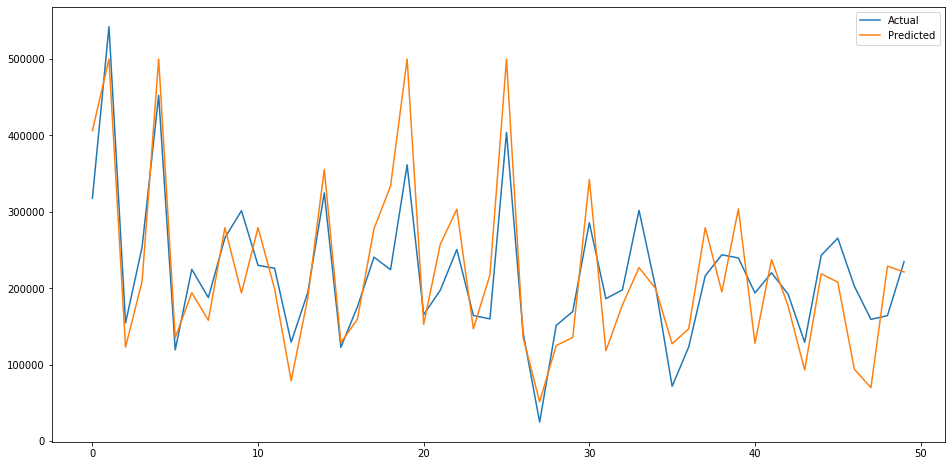

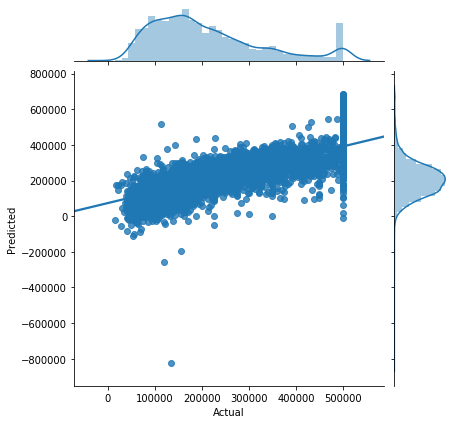

In [34]:
test = pd.DataFrame({'Predicted':Pre,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg')

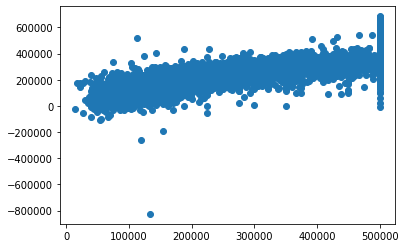

In [36]:
plt.scatter(y_test,Pre)

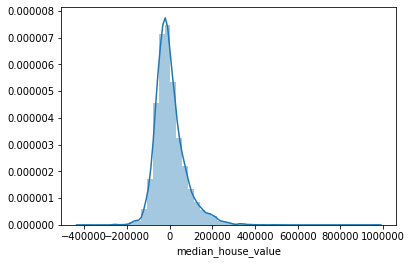

In [37]:
sns.distplot((y_test-Pre)) 

In [38]:
from sklearn import metrics

In [39]:
metrics.mean_absolute_error(y_test,Pre)

51689.899112657666

In [40]:
metrics.mean_squared_error(y_test,Pre) 

5106017634.55831

# Root Mean Squared Error 

In [41]:
np.sqrt(metrics.mean_squared_error(y_test,Pre))

71456.4037337334

Text(0.5, 1.0, 'coeff graph')

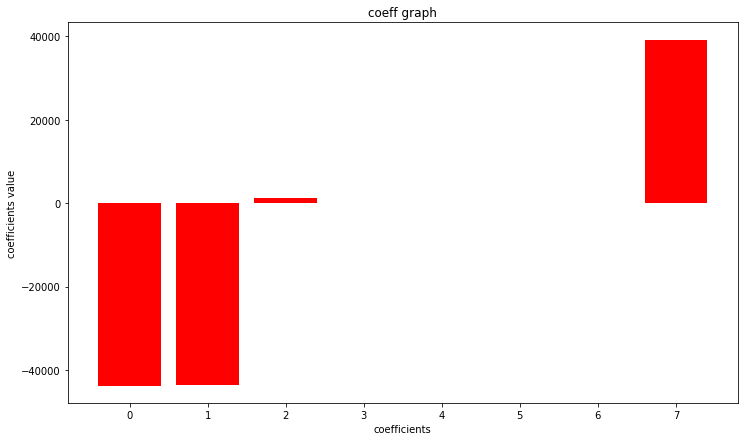

In [43]:

plt.figure(figsize=(12,7))
lm.fit(X_train,y_train)
plt.bar(np.arange(len(lm.coef_)),lm.coef_,color='red')
plt.xlabel('coefficients')
plt.ylabel('coefficients value')
plt.title('coeff graph')

# DecisionTreeRegressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [37]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
tree_reg_y_pred = tree_reg.predict(X_test)
tree_reg_y_pred 

array([261800., 500001., 127900., ..., 366100., 151400., 230700.])

In [45]:
print(np.sqrt(metrics.mean_squared_error(y_test,tree_reg_y_pred)))   

71453.08491157292


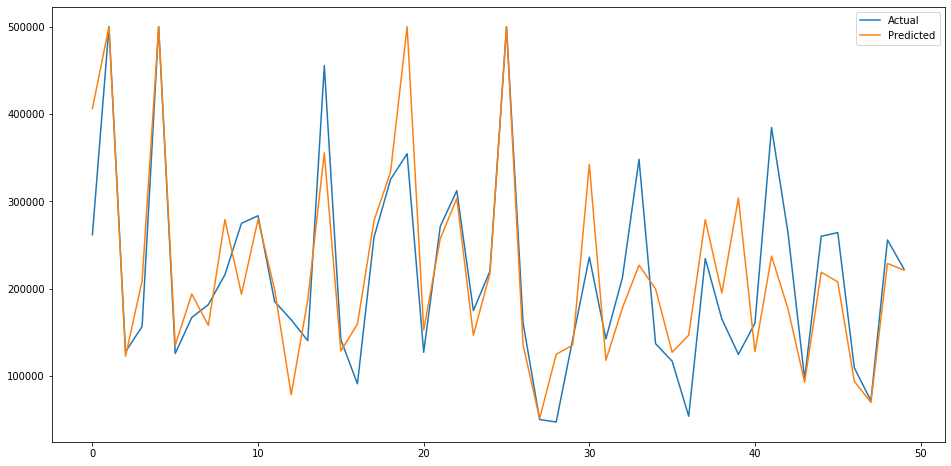

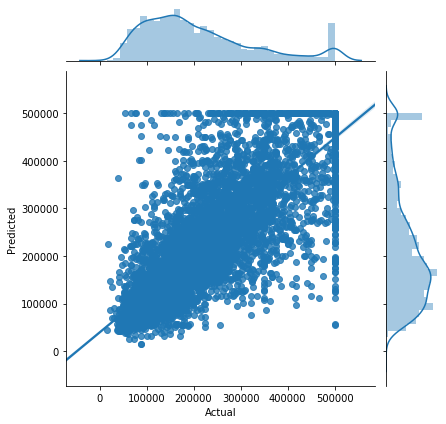

In [46]:
test = pd.DataFrame({'Predicted':tree_reg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg") 

In [68]:
cross_val_score(tree_reg, X_train, y_train, cv=10)

array([0.58524626, 0.64248264, 0.61231783, 0.60431218, 0.61989894,
       0.61313384, 0.5979735 , 0.6313712 , 0.62375217, 0.63106813])

In [69]:
tree_score = r2_score(tree_reg.predict(X_test),y_test) 
tree_score

0.6119974371073442

# RandomForestRegressor

In [47]:
rg=RandomForestRegressor(n_estimators=30)
rg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
r2_score(rg.predict(X_train),y_train) 

0.9663473024492809

In [48]:
Reg_y_pred = rg.predict(X_test)

In [49]:
print(np.sqrt(metrics.mean_squared_error(y_test,Reg_y_pred))) 

52945.761575432996


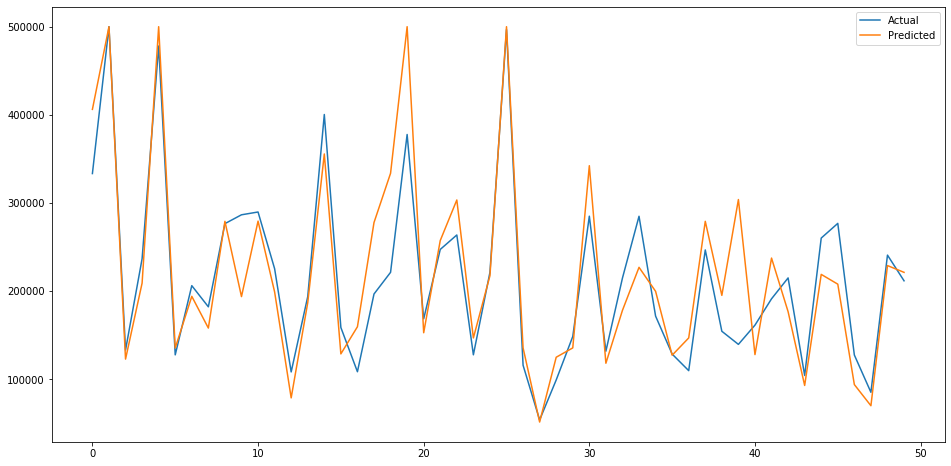

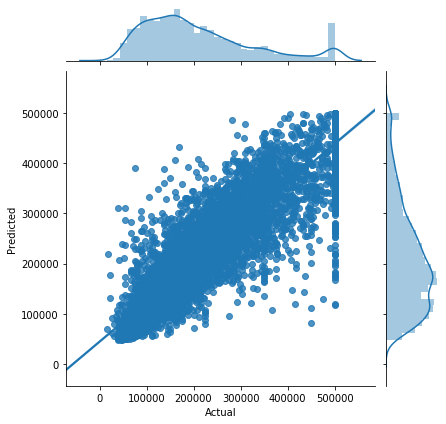

In [50]:
test = pd.DataFrame({'Predicted':Reg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg") 

In [72]:
cross_val_score(rg, X_train, y_train, cv=10) 

array([0.81980774, 0.80452509, 0.79452245, 0.79987403, 0.80586031,
       0.79348992, 0.81302166, 0.80109429, 0.80426078, 0.80740721])

In [73]:
#let's see how well the random forest regressor fits well with the test data
forest_score = r2_score(rg.predict(X_test),y_test) 
forest_score

0.7303138245811807

In [74]:
data = [reg_score,tree_score, forest_score]
index = ['Linear Regression','Decision Tree Regressor', 'Random Forest Regressor']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores']) 

,Scores
Random Forest Regressor,0.730314
Decision Tree Regressor,0.611997
Linear Regression,0.415747


In [51]:
# Linear Regression with one independent Variable

In [52]:
drop_col = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity"]
print(drop_col)


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']


In [55]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2,random_state=42) 

In [59]:
lm2 = LinearRegression()
lm2.fit(X_train2,y_train2) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print("X_train2 shape {} and size {}".format(X_train2.shape,X_train2.size))
print("X_test2 shape {} and size {}".format(X_test2.shape,X_test2.size))
print("y_train2 shape {} and size {}".format(y_train2.shape,y_train2.size))
print("y_test2 shape {} and size {}".format(y_test2.shape,y_test2.size)) 

X_train2 shape (16512, 8) and size 132096
X_test2 shape (4128, 8) and size 33024
y_train2 shape (16512,) and size 16512
y_test2 shape (4128,) and size 4128


In [65]:
y_pred2 = lm2.predict(X_test2)

In [66]:
print(len(y_pred2))
print(len(y_test2))
print(y_pred2[0:5])
print(y_test2[0:5]) 

4128
4128
[ 75595.12436233 166203.12734305 264931.72731138 275366.2795599
 278741.89263457]
20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64


Text(0, 0.5, ' Predicted median_house_value')

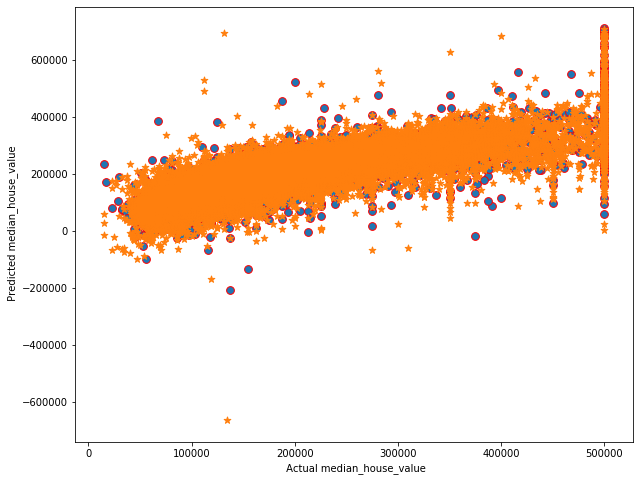

In [67]:
fig = plt.figure(figsize=(10,8))
plt.scatter(y_test2,y_pred2,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train2,lm2.predict(X_train2),marker="*",s=50)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value") 